<a href="https://colab.research.google.com/github/DilshanManathunge/TensorflowPractice/blob/master/CNN/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O sample_data/cats_and_dogs_filtered.zip

--2020-06-25 11:34:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘sample_data/cats_and_dogs_filtered.zip’

sample_data/cats_an 100%[===================>]  65.43M   214MB/s    in 0.3s    

2020-06-25 11:34:17 (214 MB/s) - ‘sample_data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [17]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
local_zip = "/content/sample_data/cats_and_dogs_filtered.zip"
zip_ref  = zipfile.ZipFile(local_zip,"r")
zip_ref.extractall("/content/sample_data")
zip_ref.close()

In [8]:
base_dir = "/content/sample_data/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"validation")

In [9]:
print(train_dir)

/content/sample_data/cats_and_dogs_filtered/train


In [10]:
cat_train_dir = os.path.join(train_dir,"cats")
dog_train_dir = os.path.join(train_dir,"dogs")
cat_validation_dir = os.path.join(validation_dir,"cats")
dog_validation_dir = os.path.join(validation_dir,"dogs")

In [11]:
model = Sequential([
                    Conv2D(32,(3,3),activation="relu",input_shape=[150,150,3]),
                    MaxPool2D(2,2),
                    Conv2D(64,(3,3),activation="relu"),
                    MaxPool2D(2,2),
                    Conv2D(128,(3,3),activation="relu"),
                    MaxPool2D(2,2),
                    Conv2D(128,(3,3),activation="relu"),
                    MaxPool2D(2,2),
                    Flatten(),
                    Dense(units=512,activation="relu"),
                    Dense(1,activation="sigmoid")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=1e-4),metrics=["accuracy"])

In [25]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1/255)

In [26]:
train_generator= train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode="binary")
test_generator= test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=test_generator,validation_steps=50,verbose=1)

Epoch 1/100
100/100 [==============================] - 102s 1s/step - loss: 0.6723 - accuracy: 0.5810 - val_loss: 0.6598 - val_accuracy: 0.6000
Epoch 2/100
 72/100 [====================>.........] - ETA: 24s - loss: 0.6386 - accuracy: 0.6278

KeyboardInterrupt: ignored

In [27]:
history = model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=test_generator,validation_steps=50,verbose=1)

Epoch 1/100
100/100 [==============================] - 110s 1s/step - loss: 0.6502 - accuracy: 0.6155 - val_loss: 0.6015 - val_accuracy: 0.6760
Epoch 2/100
100/100 [==============================] - 110s 1s/step - loss: 0.6317 - accuracy: 0.6370 - val_loss: 0.5928 - val_accuracy: 0.6900
Epoch 3/100
100/100 [==============================] - 110s 1s/step - loss: 0.6314 - accuracy: 0.6365 - val_loss: 0.5856 - val_accuracy: 0.7040
Epoch 4/100
100/100 [==============================] - 110s 1s/step - loss: 0.6141 - accuracy: 0.6555 - val_loss: 0.5797 - val_accuracy: 0.6960
Epoch 5/100
100/100 [==============================] - 110s 1s/step - loss: 0.5938 - accuracy: 0.6755 - val_loss: 0.5451 - val_accuracy: 0.7420
Epoch 6/100
100/100 [==============================] - 110s 1s/step - loss: 0.5900 - accuracy: 0.6830 - val_loss: 0.5462 - val_accuracy: 0.7180
Epoch 7/100
100/100 [==============================] - 110s 1s/step - loss: 0.5831 - accuracy: 0.6875 - val_loss: 0.6274 - val_accuracy:

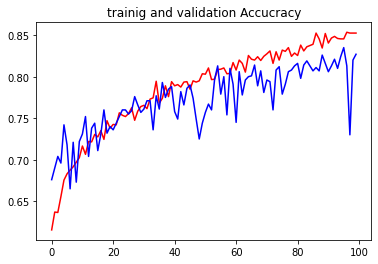

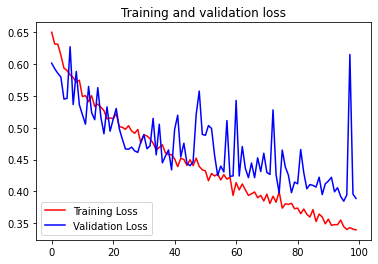

In [32]:
import matplotlib.pyplot as plt 

acc = history.history["accuracy"]
val_acc= history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs= range(len(acc))

plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,"b",label="Validation Accuracy")
plt.title("trainig and validation Accucracy")
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
